<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/LSTM_SBIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = yf.download("SBIN.NS", period="5y")

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-05,286.450012,300.000000,283.500000,294.950012,282.275635,44619891
2018-11-06,296.100006,298.299988,283.899994,286.450012,274.140900,40688243
2018-11-07,288.899994,288.899994,285.950012,286.549988,274.236572,3312160
2018-11-09,287.000000,287.500000,282.450012,283.250000,271.078369,19201007
2018-11-12,283.700012,283.700012,276.850006,277.950012,266.006165,24044907


<Axes: xlabel='Date'>

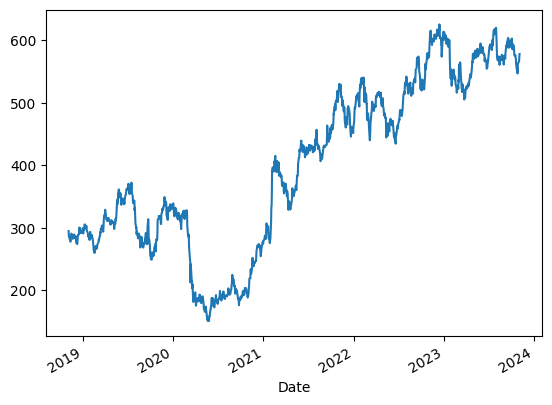

In [3]:
df.Close.plot()

In [4]:
df2 = df.Close

In [5]:
df2

Date
2018-11-05    294.950012
2018-11-06    286.450012
2018-11-07    286.549988
2018-11-09    283.250000
2018-11-12    277.950012
                 ...    
2023-10-30    565.200012
2023-10-31    565.549988
2023-11-01    566.400024
2023-11-02    572.099976
2023-11-03    578.150024
Name: Close, Length: 1236, dtype: float64

In [6]:
df2.reset_index(drop=True, inplace=True)

In [7]:
df2

0       294.950012
1       286.450012
2       286.549988
3       283.250000
4       277.950012
           ...    
1231    565.200012
1232    565.549988
1233    566.400024
1234    572.099976
1235    578.150024
Name: Close, Length: 1236, dtype: float64

In [8]:
df2.shape

(1236,)

In [9]:
df = pd.DataFrame(df2)
df

,Close
0,294.950012
1,286.450012
2,286.549988
3,283.250000
4,277.950012
...,...
1231,565.200012
1232,565.549988
1233,566.400024
1234,572.099976


### Train Test Split

In [10]:
train = df.iloc[:1220]
test = df.iloc[1220:]

In [11]:
train.shape

(1220, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler()

In [15]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## Creating the Model

In [17]:
length =16
batch_size = 32


In [18]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length= length, batch_size= batch_size)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [20]:
n_features =1


In [21]:
model= Sequential()
model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


<ipython-input-23-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


38/38 [==============================] - 3s 11ms/step - loss: 0.1051
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0719
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0402
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 8/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 9/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0057
Epoch 10/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0054


### Losses - model.history.history will give you about the loss function

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss
0,0.105053
1,0.071921
2,0.040218
3,0.016333
4,0.010652
5,0.009486
6,0.007368
7,0.006540
8,0.005742
9,0.005431


<Axes: >

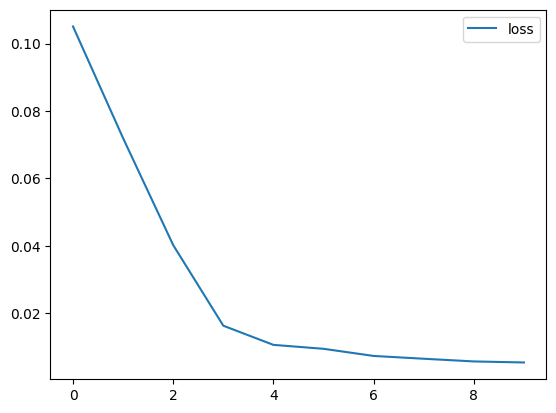

In [26]:
losses.plot()

### Evaluate Data Set

In [27]:
first_eval_batch = scaled_train[-length:]

### These are my last 16 values in dataset

In [28]:
first_eval_batch

array([[0.95459815],
       [0.94859365],
       [0.92131049],
       [0.94237865],
       [0.93374062],
       [0.93447809],
       [0.92468134],
       [0.92510273],
       [0.94322129],
       [0.95249133],
       [0.91730749],
       [0.92973775],
       [0.93416201],
       [0.9148846 ],
       [0.92868434],
       [0.92173175]])

In [29]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [30]:
first_eval_batch

array([[[0.95459815],
        [0.94859365],
        [0.92131049],
        [0.94237865],
        [0.93374062],
        [0.93447809],
        [0.92468134],
        [0.92510273],
        [0.94322129],
        [0.95249133],
        [0.91730749],
        [0.92973775],
        [0.93416201],
        [0.9148846 ],
        [0.92868434],
        [0.92173175]]])

In [31]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 507ms/step


array([[0.90521675]], dtype=float32)

In [32]:
test_predictions = []

In [33]:
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 31ms/step


In [34]:
test_predictions

[array([0.90521675], dtype=float32),
 array([0.9023695], dtype=float32),
 array([0.8880265], dtype=float32),
 array([0.8789925], dtype=float32),
 array([0.8755545], dtype=float32),
 array([0.8653832], dtype=float32),
 array([0.8480309], dtype=float32),
 array([0.84574], dtype=float32),
 array([0.84058416], dtype=float32),
 array([0.8296139], dtype=float32),
 array([0.8189558], dtype=float32),
 array([0.8128086], dtype=float32),
 array([0.8096678], dtype=float32),
 array([0.8013924], dtype=float32),
 array([0.7936171], dtype=float32),
 array([0.78734523], dtype=float32)]

### After you get ur reqd. predictions then you may need to get the scaled value back to original value


In [35]:
true_predictions = scaler.inverse_transform(test_predictions)

In [36]:
true_predictions

array([[580.51113262],
       [579.15968339],
       [572.35176747],
       [568.06378988],
       [566.43194514],
       [561.6041404 ],
       [553.36787938],
       [552.28050157],
       [549.83327199],
       [544.62625008],
       [539.56736164],
       [536.64959043],
       [535.15883463],
       [531.23089268],
       [527.54037169],
       [524.56341499]])

In [37]:
test['predictions'] = true_predictions

<ipython-input-37-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [38]:
test

,Close,predictions
1220,586.049988,580.511133
1221,576.150024,579.159683
1222,575.650024,572.351767
1223,576.450012,568.063790
1224,572.650024,566.431945
1225,571.200012,561.604140
1226,563.099976,553.367879
1227,552.950012,552.280502
1228,556.200012,549.833272
1229,547.000000,544.626250


<Axes: >

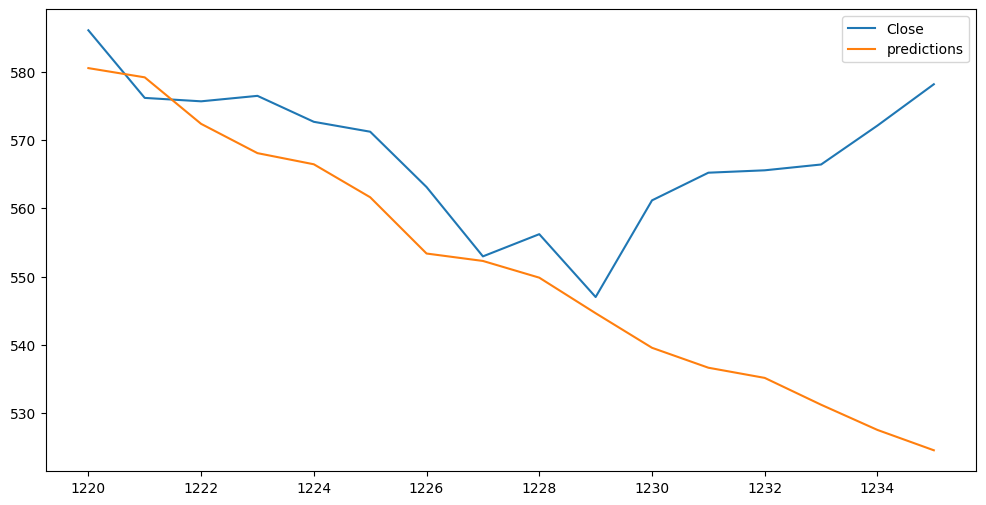

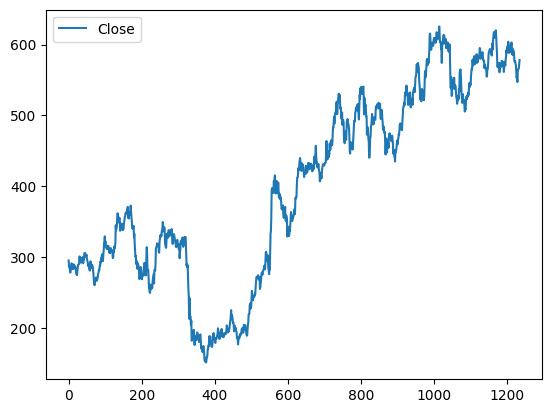

In [39]:
test.plot(figsize=(12,6))
df.plot()

### Let's create now full model


In [40]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [41]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length= length, batch_size= 32)

In [42]:
model= Sequential()
model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [43]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


<ipython-input-43-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


39/39 [==============================] - 1s 5ms/step - loss: 0.0536
Epoch 2/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0309
Epoch 3/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0290
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0205
Epoch 6/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0164
Epoch 7/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 8/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 10/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0067


In [44]:
losses = pd.DataFrame(model.history.history)

<Axes: >

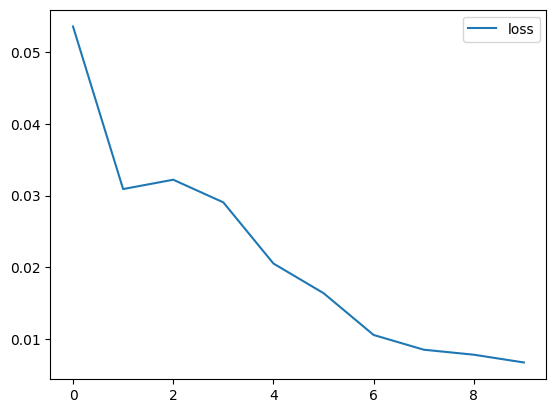

In [45]:
losses.plot()

In [46]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(20):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 28ms/step


In [47]:
forecast = scaler.inverse_transform(forecast)

In [48]:
forecast

array([[601.93246148],
       [593.76692882],
       [602.54177216],
       [592.60916213],
       [605.0969615 ],
       [598.36116021],
       [607.3724909 ],
       [595.47917755],
       [607.66315617],
       [602.70639949],
       [604.36551708],
       [599.2149364 ],
       [604.31006605],
       [598.33960221],
       [603.16638846],
       [595.88894938],
       [604.71545272],
       [594.5831341 ],
       [608.31026409],
       [591.10256318]])

In [49]:
forecast.flatten()

array([601.93246148, 593.76692882, 602.54177216, 592.60916213,
       605.0969615 , 598.36116021, 607.3724909 , 595.47917755,
       607.66315617, 602.70639949, 604.36551708, 599.2149364 ,
       604.31006605, 598.33960221, 603.16638846, 595.88894938,
       604.71545272, 594.5831341 , 608.31026409, 591.10256318])

In [50]:
df_array = np.array(df)
df_array

array([[294.95001221],
       [286.45001221],
       [286.54998779],
       ...,
       [566.40002441],
       [572.09997559],
       [578.15002441]])

In [51]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

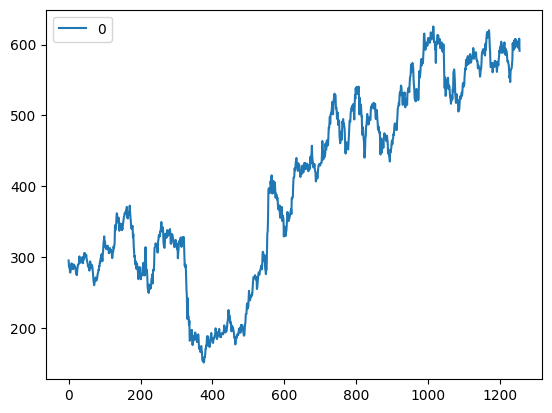

In [52]:
full_data.plot()

## LSTM

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [54]:
length =16


In [55]:
scaled_test.shape

(16, 1)

In [56]:
length =15

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=32)






In [57]:
model= Sequential()
model.add(LSTM(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [58]:
model.fit_generator(generator, epochs=20,validation_data=validation_generator, callbacks=[early_stop], shuffle=False)

Epoch 1/20


<ipython-input-58-4612b74385c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20,validation_data=validation_generator, callbacks=[early_stop], shuffle=False)


38/38 [==============================] - 3s 23ms/step - loss: 0.0718 - val_loss: 0.0090
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0299 - val_loss: 0.0024
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0182 - val_loss: 3.2898e-05
Epoch 4/20
38/38 [==============================] - 1s 13ms/step - loss: 0.0090 - val_loss: 5.2037e-04
Epoch 5/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0073 - val_loss: 0.0014


In [59]:
losses = pd.DataFrame(model.history.history)

<Axes: >

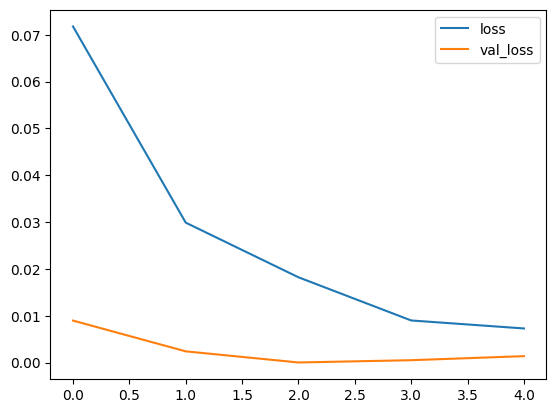

In [60]:
losses.plot()

In [61]:
len(test)

16

In [62]:



test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 22ms/step


<ipython-input-63-0c99d0b30835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

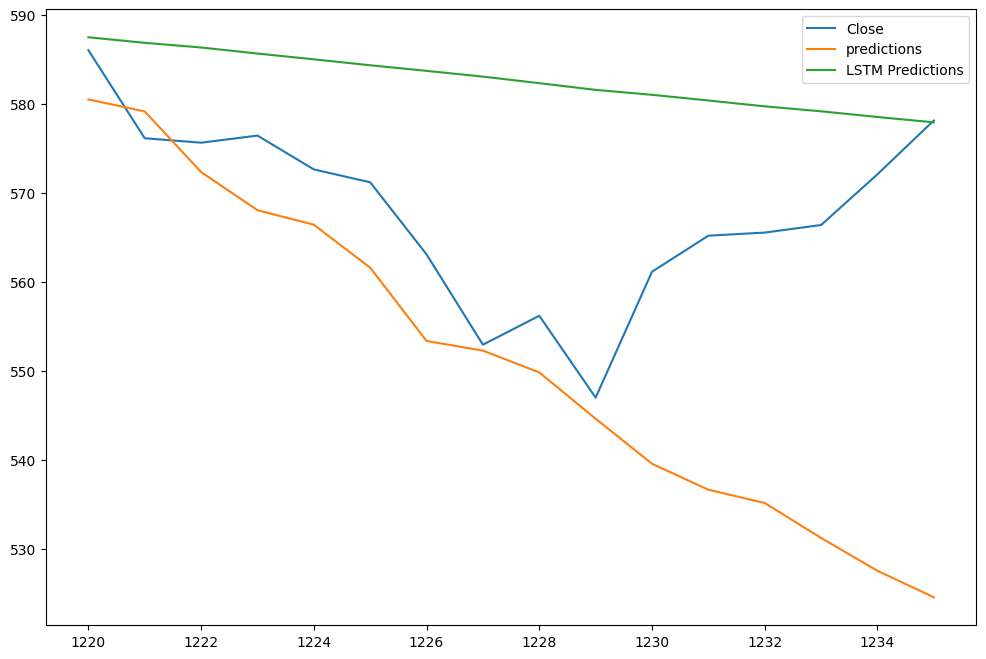

In [63]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [64]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(15):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 21ms/step


In [65]:
forecast = scaler.inverse_transform(forecast)

In [66]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

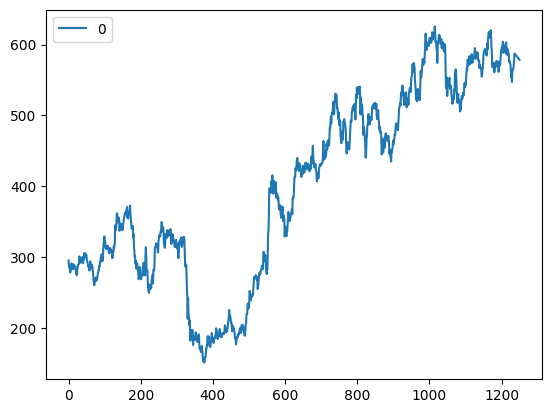

In [67]:
full_data.plot()

In [68]:
forecast

array([[587.49782155],
       [586.87396911],
       [586.35120165],
       [585.66960659],
       [585.02017878],
       [584.35199381],
       [583.72304894],
       [583.07653514],
       [582.33940416],
       [581.58597737],
       [581.03240064],
       [580.39344063],
       [579.73566687],
       [579.17866689],
       [578.53744357]])

In [70]:
full_data.tail(10)

,0
1241,584.351994
1242,583.723049
1243,583.076535
1244,582.339404
1245,581.585977
1246,581.032401
1247,580.393441
1248,579.735667
1249,579.178667
1250,578.537444


In [71]:
forecast.flatten()

array([587.49782155, 586.87396911, 586.35120165, 585.66960659,
       585.02017878, 584.35199381, 583.72304894, 583.07653514,
       582.33940416, 581.58597737, 581.03240064, 580.39344063,
       579.73566687, 579.17866689, 578.53744357])

In [72]:
new_data  = full_data.tail(10)